In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve # <이제 없어짐
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 이진 분류(Binary class classification)

Breast cancer 데이터 셋에서 악성종양/양성종양 분류

## 데이터 준비

In [94]:
cancer = datasets.load_breast_cancer()

In [95]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [97]:
X= cancer.data.copy()
y= cancer.target.copy()

In [98]:
X.shape, y.shape

((569, 30), (569,))

## 데이터 탐색

In [99]:
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


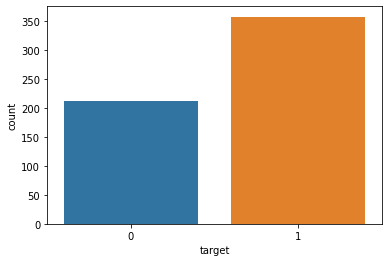

In [101]:
sns.countplot(x='target', data=cancer_df)
plt.show()

In [102]:
cancer_df['mean area'].describe()
# 분산이 크다 -> 최솟값 143, 최댓값 2501

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean area, dtype: float64

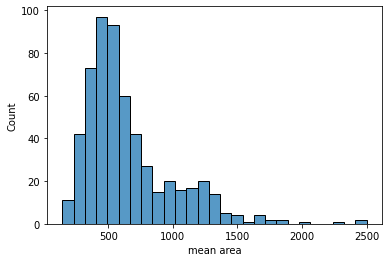

In [103]:
sns.histplot(data=cancer_df, x='mean area')
plt.show()

In [104]:
cancer_df['mean radius'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

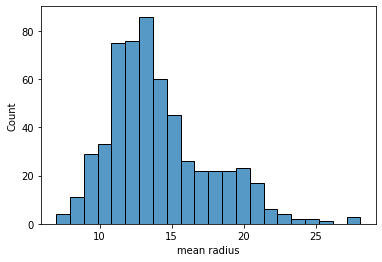

In [105]:
sns.histplot(data=cancer_df, x='mean radius')
plt.show()
# 변수들마다 스케일이 달라서 모든 변수들을 비슷한 스케일로 맞춰주겠다 => 스케일링 작업 진행하기

## 훈련 셋, 테스트 셋 분리

In [106]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)
# y가 악성종양과 양성종양의 비율이 일정하지 않기때문에 각자 비율이 랜덤하고 일정하게 분포하겠다.
# stratify = y 
# 분류문제에서는 항상 stratify 파라미터를 사용해주는 것이 좋다.

In [107]:
X_tr.shape, y_tr.shape

((455, 30), (455,))

In [108]:
np.unique(y_tr, return_counts=True)

(array([0, 1]), array([170, 285]))

In [109]:
np.unique(y_te, return_counts=True)

(array([0, 1]), array([42, 72]))

## KNN classifier

In [110]:
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [111]:
knn_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [112]:
# 훈련 셋 예측값
tr_pred = knn_model.predict(X_tr)
tr_pred[:3]

array([1, 0, 1])

In [113]:
confusion_matrix(y_tr,tr_pred)

array([[161,   9],
       [  3, 282]])

In [114]:
tr_proba = knn_model.predict_proba(X_tr)
tr_proba[:3]

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [115]:
# 훈련셋에서의 정확도
knn_model.score(X_tr,y_tr)

0.9736263736263736

In [116]:
print(classification_report(y_tr,tr_pred, target_names=cancer.target_names))
# 정확도가 똑같을때 recall이 크다는 것은 정답률이 높은것이므로 recall이 높은것을 봐야한다.

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       170
      benign       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [117]:
# 테스트 셋 예측값
te_pred = knn_model.predict(X_te)
te_pred[:3]
# confusion_matrix를 보기 위해서 예측값확인

array([0, 1, 0])

In [118]:
confusion_matrix(y_te,te_pred)

array([[39,  3],
       [ 2, 70]])

In [119]:
print(classification_report(y_te,te_pred, target_names=cancer.target_names))
# 약간의 과대적합모델

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Precision Recall Curve

* 정밀도(precision)와 재현율(recall)은 trade-off관계 / 동시에 둘다 좋게 할 수는 없다.
* 같은 정확도(accuarcy)에서 정밀도가 높아지면 재현율은 낮아지고, 재현율이 높아지면 정밀도가 낮아진다.
* precision_recall curve: 정밀도를 y축, 재현율을 x축으로 설정해서, 정밀도와 재현율의 trade_off관계를 시각화한 그래프.

In [120]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


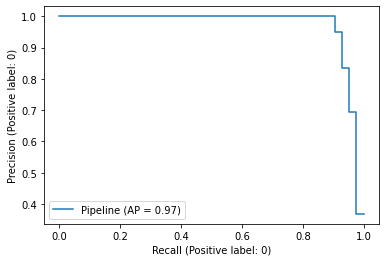

In [121]:
plot_precision_recall_curve(estimator=knn_model, # 예측기 (ML모델)
                            X= X_te,             # 데이터 (특성 2차원 배열)
                            y= y_te,             # 레이블 (타겟 1차원 배열)
                            pos_label=0)         # 양성(positive)로 사용할 레이블 / 
                                                 # 타겟에는 0과 1이 있으니까 0으로 positive로 보겠다는 뜻. 기본값은 1
plt.show()

deprecate warining을 없애기 위해서 생긴 sklearn 1.0버전에서 새로 생긴 메서드

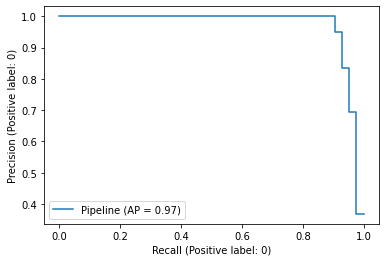

In [122]:
PrecisionRecallDisplay.from_estimator(estimator=knn_model,
                                      X= X_te,
                                      y= y_te,
                                      pos_label=0)
plt.show()

### ROC(Receiver Operating Characteristic) Curve

**ROC(Receiver Operating Characteristic) Curve**

가짜 양성 비율(FPR: False Positive Rate)에 대한 진짜 양성 비율(TPR: True Positive Rate)의 곡선. FPR을 x축에, TPR을 y축에 그린 곡선.
 
 * __특이도(specificity/TNR)__: TN / (FP + TN) 진짜 음성 비율. 
  * 실제 음성 샘플들 중에서 정답(음성으로) 맞게 예측한 비율.
 * __민감도(senstivity/TPR)__: TP / (TP+FP) 진짜 양성 비율. 
  * 실제 양성 샘플들 중에서 양성으로 맞게 예측한 비율. 
 * __재현율(recall/TPR)__: TP / (TP + FN) : 
  * 실제 양성 샘플등 중에서 정답의 비율
 * __FPR(가짜 양성 비율)__: = FP / (FP + TN) : 
  * 실제 음성 샘플들 중에서 오답(가짜 양성, 양성예측) 비율. = 1 - TN / (FP + TN) = 1 - TNR
 * __AUC__(Area Under Curve): ROC 곡선의 아래쪽 넓이.
    * AUC가 1에 가까울 수록 좋은 분류 모델.


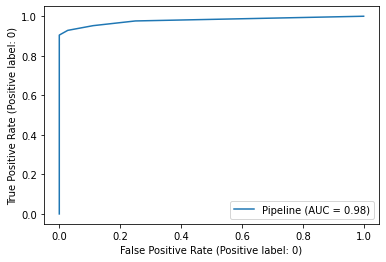

In [123]:
RocCurveDisplay.from_estimator(estimator=knn_model, 
                               X=X_te, 
                               y=y_te, 
                               pos_label=0)
plt.show()

##Logistic Regression

In [124]:
lo = Pipeline([('scaler', StandardScaler()),
               ('clf', LogisticRegression())])

In [125]:
lo.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [126]:
tr_pred = lo.predict(X_tr)

In [127]:
confusion_matrix(y_tr, tr_pred)

array([[166,   4],
       [  1, 284]])

In [128]:
lo.score(X_tr,y_tr) #훈련셋에서의 정확도

0.989010989010989

In [129]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.98      0.99       170
      benign       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [130]:
te_pred = lo.predict(X_te)

In [131]:
lo.score(X_te,y_te) #테스트셋에서의 정확도

0.9824561403508771

In [132]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



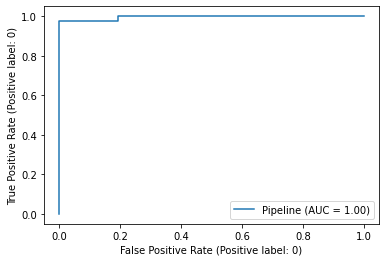

In [133]:
RocCurveDisplay.from_estimator(estimator=lo, 
                               X=X_te, 
                               y=y_te, 
                               pos_label=0)
plt.show()

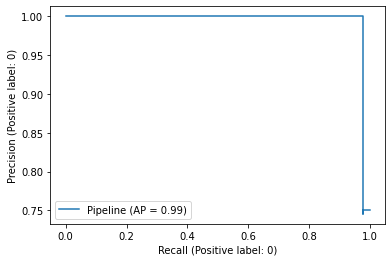

In [134]:
PrecisionRecallDisplay.from_estimator(estimator=lo,
                                      X= X_te,
                                      y= y_te,
                                      pos_label=0)
plt.show()

## SGD classifier

In [135]:
sgd_model = Pipeline([('scaler', StandardScaler()),
               ('clf', SGDClassifier())])

In [136]:
sgd_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SGDClassifier())])

In [137]:
tr_pred = sgd_model.predict(X_tr)

In [138]:
sgd_model.score(X_tr,y_tr) # 훈련셋에서의 정확도

0.9824175824175824

In [139]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98       170
      benign       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [140]:
te_pred = sgd_model.predict(X_te)

In [141]:
sgd_model.score(X_te,y_te)

0.9649122807017544

In [142]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        42
      benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



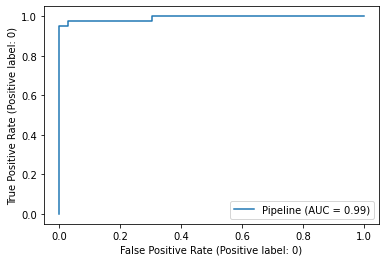

In [143]:
RocCurveDisplay.from_estimator(estimator=sgd_model, 
                               X=X_te, 
                               y=y_te, 
                               pos_label=0)
plt.show()

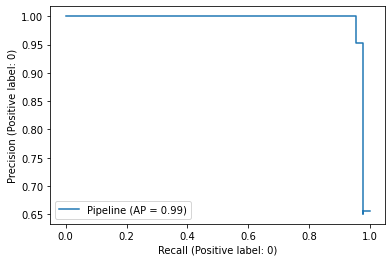

In [144]:
PrecisionRecallDisplay.from_estimator(estimator=sgd_model,
                                      X= X_te,
                                      y= y_te,
                                      pos_label=0)
plt.show()

# 다중 클래스 분류

* scikit-learn 패키지의 iris 예제 데이터 셋을 로딩.
* setosa/versicolor/virginca: 3개 클래스를 갖는 분류 문제.
* 3가지 머신 러닝 분류 모델 비교

## iris datasets

In [167]:
iris = datasets.load_iris()

In [168]:
X, y = iris.data.copy(), iris.target.copy()

In [169]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [170]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [171]:
X.shape, y.shape

((150, 4), (150,))

In [173]:
X_tr,X_te,y_tr,y_te = train_test_split(X, y,
                                       test_size=0.2,
                                       stratify=y,
                                       random_state=42)

In [174]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

## KNN Classifier

In [175]:
knn_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

In [176]:
knn_model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [177]:
tr_pred = knn_model.predict(X_tr)

In [178]:
confusion_matrix(y_tr,tr_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [179]:
print(classification_report(y_tr,tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.97      0.96        40
   virginica       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [181]:
te_pred = knn_model.predict(X_te)

In [182]:
confusion_matrix(y_te,te_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [183]:
print(classification_report(y_te,te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [209]:
knn_tr_score = knn_model.score(X_tr,y_tr)

In [210]:
knn_te_score = knn_model.score(X_te,y_te)

## Logistic Regreession

In [184]:
logit_model = Pipeline([('sclaer', StandardScaler()),
                        ('logit', LogisticRegression())])

In [185]:
logit_model.fit(X_tr,y_tr)

Pipeline(steps=[('sclaer', StandardScaler()), ('logit', LogisticRegression())])

In [186]:
tr_pred = logit_model.predict(X_tr)

In [187]:
confusion_matrix(y_tr,tr_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [189]:
print(classification_report(y_tr,tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.95      0.94        40
   virginica       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [190]:
te_pred = logit_model.predict(X_te)

In [191]:
confusion_matrix(y_te,te_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [193]:
print(classification_report(y_te,te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [214]:
logit_tr_score = logit_model.score(X_tr,y_tr)

In [215]:
logit_te_score =logit_model.score(X_te,y_te)

## SGD classifier

In [220]:
sgd_model = Pipeline([('sclaer', StandardScaler()),
                        ('logit', SGDClassifier(loss='log', random_state=42))])

In [221]:
sgd_model.fit(X_tr,y_tr)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('logit', SGDClassifier(loss='log', random_state=42))])

In [222]:
tr_pred = sgd_model.predict(X_tr)

In [223]:
confusion_matrix(y_tr,tr_pred)

array([[40,  0,  0],
       [ 0, 32,  8],
       [ 0,  0, 40]])

In [224]:
print(classification_report(y_tr,tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.80      0.89        40
   virginica       0.83      1.00      0.91        40

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [225]:
te_pred = sgd_model.predict(X_te)

In [226]:
confusion_matrix(y_te,te_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [227]:
print(classification_report(y_te,te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [228]:
sgd_tr_score = sgd_model.score(X_tr,y_tr)

In [229]:
sgd_te_score= sgd_model.score(X_te,y_te)

In [230]:
pd.DataFrame({'model':['KNN','Logit','sgd'],
              'train_score': [knn_tr_score, logit_tr_score, sgd_tr_score],
              'test_score':[knn_te_score, logit_te_score, sgd_te_score]})

,model,train_score,test_score
0,KNN,0.975000,0.933333
1,Logit,0.958333,0.933333
2,sgd,0.933333,0.966667
